# Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

# Q1

1. Activists have asserted that there is a strong gender bias in student evaluations of professors, with
male professors enjoying a boost in rating from this bias. While this has been celebrated by ideologues,
skeptics have pointed out that this research is of technically poor quality, either due to a low sample
size – as small as n = 1 (Mitchell & Martin, 2018), failure to control for confounders such as teaching
experience (Centra & Gaubatz, 2000) or obvious p-hacking (MacNell et al., 2015). We would like you to
answer the question whether there is evidence of a pro-male gender bias in this dataset.
Hint: A significance test is probably required.

In [112]:
rmp_df = pd.read_csv('data/rmpCapstoneNum.csv',
                            names=['Avg_rating','Avg_diff','n_ratings','fw_pepper', 'p_students_retake','n_online_class_rating','fw_male','fw_female'])

In [113]:
rmp_df.head()

,Avg_rating,Avg_diff,n_ratings,fw_pepper,p_students_retake,n_online_class_rating,fw_male,fw_female
0,5.0,1.5,2.0,0.0,NaN,0.0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,3.2,3.0,4.0,0.0,NaN,0.0,1,0
3,3.6,3.5,10.0,1.0,NaN,0.0,0,0
4,1.0,5.0,1.0,0.0,NaN,0.0,0,0


In [114]:
rmp_df[(rmp_df['fw_female']==1) & (rmp_df['fw_male']==1)]

,Avg_rating,Avg_diff,n_ratings,fw_pepper,p_students_retake,n_online_class_rating,fw_male,fw_female
7,2.5,3.0,2.0,0.0,NaN,0.0,1,1
53,4.3,2.3,3.0,0.0,NaN,0.0,1,1
70,4.4,2.8,4.0,0.0,NaN,0.0,1,1
128,1.9,4.0,4.0,0.0,NaN,0.0,1,1
137,3.9,2.3,3.0,1.0,NaN,1.0,1,1
...,...,...,...,...,...,...,...,...
89710,2.9,2.7,6.0,0.0,40.0,0.0,1,1
89798,5.0,1.6,5.0,1.0,NaN,0.0,1,1
89830,4.0,2.2,5.0,0.0,NaN,0.0,1,1
89862,4.5,4.0,1.0,0.0,NaN,0.0,1,1


In [115]:
print(rmp_df.isna().sum())
print(len(rmp_df))

Avg_rating               19889
Avg_diff                 19889
n_ratings                19889
fw_pepper                19889
p_students_retake        77733
n_online_class_rating    19889
fw_male                      0
fw_female                    0
dtype: int64
89893


In [116]:
df_cleaned = rmp_df.dropna(subset=['n_ratings'])
print(np.mean(df_cleaned['n_ratings']))
df_cleaned = df_cleaned[df_cleaned['n_ratings'] > np.mean(df_cleaned['n_ratings'])]


5.374721444488887


In [117]:
rmp_df = df_cleaned

In [118]:
rmp_qual_df = pd.read_csv('data/rmpCapstoneQual.csv',
                          names=['Major/Field','Universtiy','US_state'])
rmp_qual_df.head()

,Major/Field,Universtiy,US_state
0,Criminal Justice,George Mason University,VA
1,NaN,NaN,NaN
2,English,Alabama State University,AL
3,English,University of Kentucky,KY
4,English,Keiser University,FL


In [119]:
rmp_tag_df = pd.read_csv('data/rmpCapstoneTags.csv',
                         names=['tough_grader','good_feedback','respected','lots_to_read',
                                'participation_matters','dscoywp','lots_homework','inspirationl',
                                "pop_quizes",'accessible','many_papers','clear_grading','hilarious',
                                'test_heavy','graded_by_few_things','amazing_lectures','extra_credit','caring',
                                'group_proj','lecture_heavy'])

In [120]:
rmp_tag_df.head()

,tough_grader,good_feedback,respected,lots_to_read,participation_matters,dscoywp,lots_homework,inspirationl,pop_quizes,accessible,many_papers,clear_grading,hilarious,test_heavy,graded_by_few_things,amazing_lectures,extra_credit,caring,group_proj,lecture_heavy
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,3,0,0,2,4,2,1,0,0,0,2,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Comparison between two males and females**

Ho: There is no gender bias in students evaluations - males and female are rated the same

Ha: There is a difference in gender bias in students eval - males are rated higher average than females prof


In [121]:
male_rating_df = rmp_df[(rmp_df['fw_male']==1) & (rmp_df['fw_female']==0)]
female_rating_df = rmp_df[(rmp_df['fw_female']==1) & (rmp_df['fw_male']==0)]

In [122]:
rmp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20577 entries, 3 to 89890
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Avg_rating             20577 non-null  float64
 1   Avg_diff               20577 non-null  float64
 2   n_ratings              20577 non-null  float64
 3   fw_pepper              20577 non-null  float64
 4   p_students_retake      11938 non-null  float64
 5   n_online_class_rating  20577 non-null  float64
 6   fw_male                20577 non-null  int64  
 7   fw_female              20577 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.4 MB


In [123]:
male_rating_df.head()

,Avg_rating,Avg_diff,n_ratings,fw_pepper,p_students_retake,n_online_class_rating,fw_male,fw_female
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0
21,2.6,4.1,10.0,0.0,NaN,0.0,1,0
39,3.5,3.2,20.0,1.0,NaN,0.0,1,0
46,4.2,1.8,26.0,1.0,57.0,8.0,1,0
64,3.1,3.7,7.0,0.0,50.0,1.0,1,0


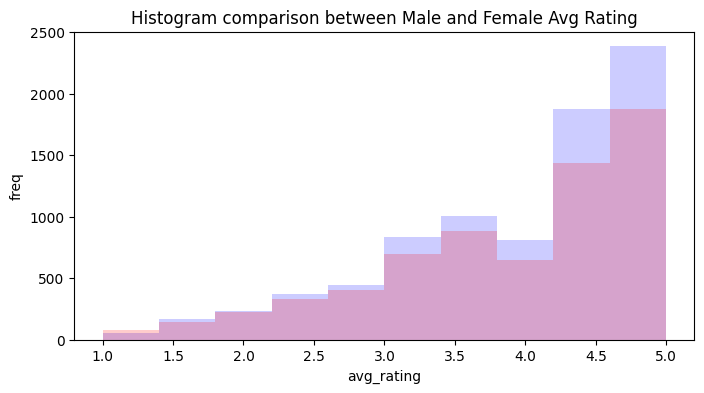

In [124]:
plt.figure(figsize=(8,4))
plt.hist(male_rating_df['Avg_rating'], alpha=0.2, color='blue')
plt.hist(female_rating_df['Avg_rating'], alpha=0.2, color='red')
plt.ylabel('freq')
plt.xlabel('avg_rating')
plt.title('Histogram comparison between Male and Female Avg Rating')
plt.show()

Performing a Mann Whitney U test as the data is not normally distributed 

In [125]:
stat, pvalue = stats.mannwhitneyu(male_rating_df['Avg_rating'], female_rating_df['Avg_rating'], alternative='greater')
print(stat, pvalue)


28300005.5 0.0003929858837938564


Plotting the violin plot for better visual clarity

In [126]:
# Create a new 'Gender' column based on the logic
def determine_gender(row):
    if (row['fw_male'] == 1) & (row['fw_female'] == 0):
        return 'Male'
    elif (row['fw_female'] == 1) & (row['fw_male'] == 0):
        return 'Female'
    else:
        return 'Not Identified'


rmp_df['Gender'] = rmp_df.apply(determine_gender, axis=1)

In [127]:
rmp_df[(rmp_df['fw_female']==0) & (rmp_df['fw_male']==1)]

,Avg_rating,Avg_diff,n_ratings,fw_pepper,p_students_retake,n_online_class_rating,fw_male,fw_female,Gender
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0,Male
21,2.6,4.1,10.0,0.0,NaN,0.0,1,0,Male
39,3.5,3.2,20.0,1.0,NaN,0.0,1,0,Male
46,4.2,1.8,26.0,1.0,57.0,8.0,1,0,Male
64,3.1,3.7,7.0,0.0,50.0,1.0,1,0,Male
...,...,...,...,...,...,...,...,...,...
89810,3.4,3.4,14.0,0.0,54.0,5.0,1,0,Male
89833,1.4,4.1,7.0,0.0,NaN,0.0,1,0,Male
89855,4.0,1.9,11.0,1.0,60.0,0.0,1,0,Male
89877,3.6,3.4,10.0,0.0,50.0,1.0,1,0,Male


/var/folders/w1/b1w4nxzd69q4q3mzdg9170wm0000gn/T/ipykernel_39485/3047085761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=rmp_df, x='Gender', y='Avg_rating', palette='muted', inner='quartile')


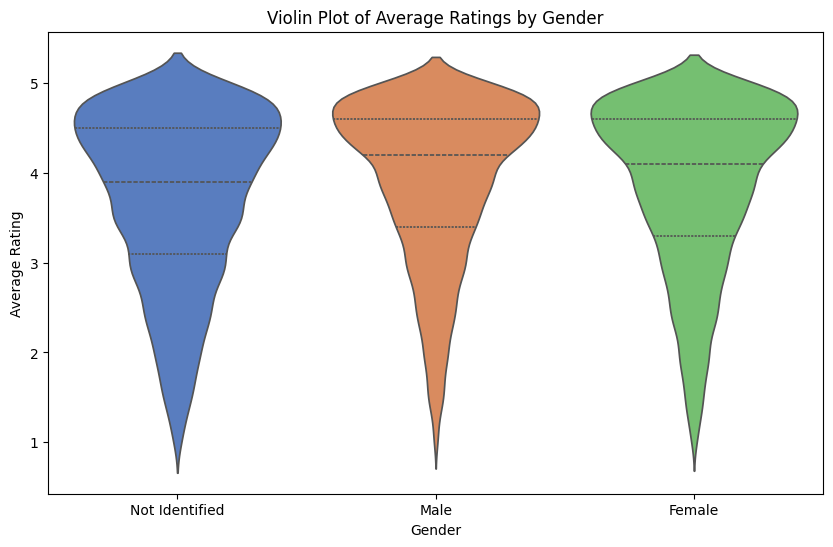

In [128]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=rmp_df, x='Gender', y='Avg_rating', palette='muted', inner='quartile')
plt.title('Violin Plot of Average Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.show()

# Q3

3. What is the likely size of both of these effects (gender bias in average rating, gender bias in spread of
average rating), as estimated from this dataset? Please use 95% confidence and make sure to report
each/both.

In [ ]:
rng = np.random.default_rng(17010868)

def bootstrap(arr1, arr2):
    # Set number of experiments
    num_experiments = int(1e4) # 10000 runs

    # Set number of samples per experiment
    num_samples1 = len(arr1) # Sample 2000 values in each experiment
    num_samples2 = len(arr2) # Sample 2000 values in each experiment


    # Store the sample means in a list
    bootstrapped_d = []
    # First let's try sampling once
    for i in range(num_experiments):
        # Collect 2000 samples
        indices1 = rng.integers(low=0, high=num_samples1, size=num_samples1)
        indices2 = rng.integers(low=0, high=num_samples2, size=num_samples2)

        # print(indices)
        sampled_ratings1 = arr1[indices1]
        sampled_ratings2 = arr2[indices2]
        # print(sampled_ratings)
        # Find the sample mean
        mean1 = np.mean(sampled_ratings1)
        mean2 = np.mean(sampled_ratings2)
        std1 = np.std(sampled_ratings1)
        std2 = np.std(sampled_ratings2)


        numerator = mean1 - mean2
        denominator = np.sqrt((std1**2)/2 + (std2**2)/2) # pooled std
        d = numerator/denominator
        bootstrapped_d.append(d)
    return bootstrapped_d

In [182]:
male_rating_df.head()

,Avg_rating,Avg_diff,n_ratings,fw_pepper,p_students_retake,n_online_class_rating,fw_male,fw_female
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0
21,2.6,4.1,10.0,0.0,NaN,0.0,1,0
39,3.5,3.2,20.0,1.0,NaN,0.0,1,0
46,4.2,1.8,26.0,1.0,57.0,8.0,1,0
64,3.1,3.7,7.0,0.0,50.0,1.0,1,0


In [183]:
effect_size = bootstrap(male_rating_df['Avg_rating'].to_numpy(),female_rating_df['Avg_rating'].to_numpy())

In [ ]:
## THIS IS THE ONE
def variance_diff_bootstrap(arr1, arr2):
    # Set number of experiments
    num_experiments = int(1e4) # 10000 runs

    # Set number of samples per experiment
    num_samples1 = len(arr1) # Sample 2000 values in each experiment
    num_samples2 = len(arr2) # Sample 2000 values in each experiment


    # Store the sample means in a list
    bootstrapped_var1 = []
    bootstrapped_var2 = []
    # First let's try sampling once
    for i in range(num_experiments):
        # Collect 2000 samples
        indices1 = rng.integers(low=0, high=num_samples1, size=num_samples1)
        indices2 = rng.integers(low=0, high=num_samples2, size=num_samples2)

        # print(indices)
        sampled_ratings1 = arr1[indices1]
        sampled_ratings2 = arr2[indices2]
        # print(sampled_ratings)
        # Find the sample mean
        bootstrapped_var1.append(np.var(sampled_ratings1))
        bootstrapped_var2.append(np.var(sampled_ratings2))
    return bootstrapped_var1, bootstrapped_var2


var1, var2 = variance_diff_bootstrap(male_rating_df['Avg_rating'].to_numpy(),female_rating_df['Avg_rating'].to_numpy())

In [184]:
var_effect_size = bootstrap(np.array(var1),np.array(var2))

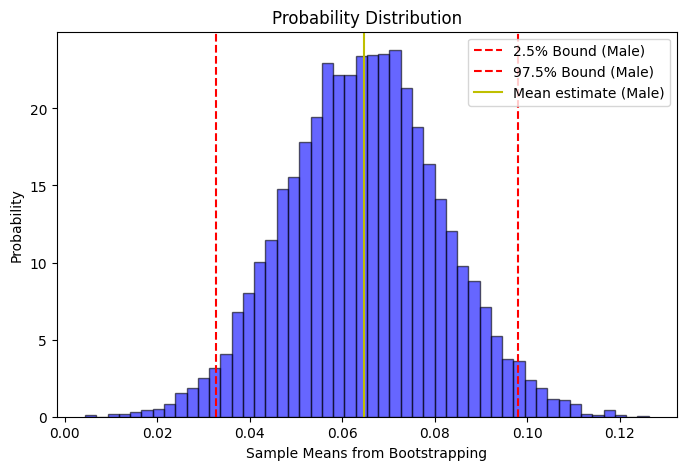

In [158]:
# Let's calculate the 95% confidence intervals
lower_confidence_bound_male = np.percentile(effect_size, 2.5)
upper_confidence_bound_male = np.percentile(effect_size, 97.5)

# Let's plot these two points on the plot!

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(effect_size, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')

# Calculate population mean estimate from bootstrap
effect_size_mean = np.mean(effect_size)

# Add confidence bounds as vertical lines
plt.axvline(lower_confidence_bound_male, color='r', linestyle='dashed', linewidth=1.5, label='2.5% Bound (Male)')
plt.axvline(upper_confidence_bound_male, color='r', linestyle='dashed', linewidth=1.5, label='97.5% Bound (Male)')
plt.axvline(effect_size_mean, color='y', linestyle='solid', linewidth=1.5, label='Mean estimate (Male)')


# Adding labels and title
plt.xlabel('Sample Means from Bootstrapping')
plt.ylabel('Probability')
plt.title('Probability Distribution')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Calculate 95% CI for mean differences
ci_mean_diff = np.percentile(effect_size, [2.5, 97.5])
effect_size_mean_diff = np.mean(effect_size)

# Print Results
print(f"Mean Difference: {effect_size_mean_diff}, 95% CI: {ci_mean_diff}")

Mean Difference: 0.06475166727430089, 95% CI: [0.03275269 0.09791453]


In [179]:
# Calculate 95% CI for mean differences
ci_var_diff = np.percentile(var_effect_size, [2.5, 97.5])
effect_size_var_diff = np.mean(var_effect_size)

# Print Results
print(f"Mean Difference: {effect_size_var_diff}, 95% CI: {ci_var_diff}")

Mean Difference: -4.839673390481996, 95% CI: [-4.89405194 -4.78566709]


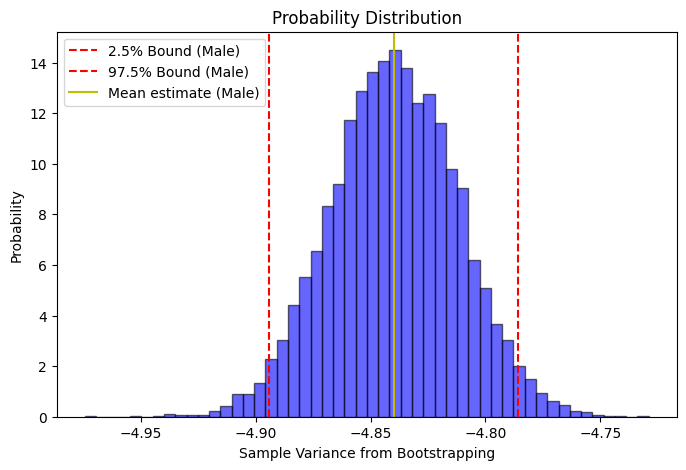

In [178]:
# Let's calculate the 95% confidence intervals
lower_confidence_bound_male = np.percentile(var_effect_size, 2.5)
upper_confidence_bound_male = np.percentile(var_effect_size, 97.5)

# Let's plot these two points on the plot!

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(var_effect_size, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')

# Calculate population mean estimate from bootstrap
effect_size_var = np.mean(var_effect_size)

# Add confidence bounds as vertical lines
plt.axvline(lower_confidence_bound_male, color='r', linestyle='dashed', linewidth=1.5, label='2.5% Bound (Male)')
plt.axvline(upper_confidence_bound_male, color='r', linestyle='dashed', linewidth=1.5, label='97.5% Bound (Male)')
plt.axvline(effect_size_var, color='y', linestyle='solid', linewidth=1.5, label='Mean estimate (Male)')


# Adding labels and title
plt.xlabel('Sample Variance from Bootstrapping')
plt.ylabel('Probability')
plt.title('Probability Distribution')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [131]:
# Gender bias spread
bootstrapped_means = []
num_samples = 2000
num_experiments = int(1e4) # 10000 runs
rng = np.random.default_rng(1)

for i in range(num_experiments):
    # Collect 2000 samples
    male_idx = rng.integers(low=0, high=len(male_rating_df), size=num_samples)
    female_idx = rng.integers(low=0, high=len(female_rating_df), size=num_samples)

    male_value = male_rating_df['Avg_rating'].values[male_idx]
    female_value = female_rating_df['Avg_rating'].values[female_idx]

    variance_ratio = np.var(male_value, ddof=1) / np.var(female_value, ddof=1)
    bootstrapped_means.append(variance_ratio)


lower_confidence_bound = np.percentile(bootstrapped_means, 2.5)
upper_confidence_bound = np.percentile(bootstrapped_means, 97.5)

print(f"Bootstrap 95% CI for Variance Ratio: [{lower_confidence_bound}, {upper_confidence_bound}]")

Bootstrap 95% CI for Variance Ratio: [0.8399851632582378, 1.0081924536481621]


### Trying via differences


In [188]:
variance_ratios = [v1 / v2 for v1, v2 in zip(var1, var2)]

# Calculate 95% CI for variance ratios
ci_var_ratio = np.percentile(variance_ratios, [2.5, 97.5])
effect_size_var_ratio = np.mean(variance_ratios)

print(f"Variance Ratio: {effect_size_var_ratio}, 95% CI: {ci_var_ratio}")

Variance Ratio: 0.9206010552823342, 95% CI: [0.87851172 0.96444532]


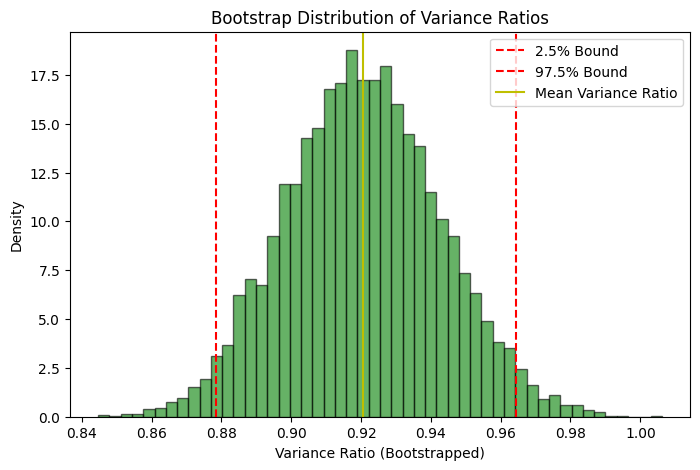

In [187]:
# Plotting Part 2: Variance Ratios
plt.figure(figsize=(8, 5))
plt.hist(variance_ratios, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')

plt.axvline(ci_var_ratio[0], color='r', linestyle='dashed', linewidth=1.5, label='2.5% Bound')
plt.axvline(ci_var_ratio[1], color='r', linestyle='dashed', linewidth=1.5, label='97.5% Bound')
plt.axvline(effect_size_var_ratio, color='y', linestyle='solid', linewidth=1.5, label='Mean Variance Ratio')

plt.xlabel('Variance Ratio (Bootstrapped)')
plt.ylabel('Density')
plt.title('Bootstrap Distribution of Variance Ratios')
plt.legend()
plt.show()

This bias spread could indicates that if we were to sample this multiple times, 95% of the time the female ratings would be more variable than the men

# Q9

9. Build a regression model predicting average difficulty from all tags (the ones in the
rmpCapstoneTags.csv) file. Make sure to include the R2 and RMSE of this model. Which of these tags is
most strongly predictive of average difficulty? Hint: Make sure to address collinearity concerns.

In [132]:
# Normalize the tags by the number of ratings
rmp_tags_normalized = rmp_tag_df.div(rmp_df['n_ratings'], axis=0)


In [133]:
avg_diff_tags_df = pd.merge(rmp_df['Avg_diff'], rmp_tags_normalized, how='left', left_index=True, right_index= True)
avg_diff_tags_df.head()

,Avg_diff,tough_grader,good_feedback,respected,lots_to_read,participation_matters,dscoywp,lots_homework,inspirationl,pop_quizes,...,many_papers,clear_grading,hilarious,test_heavy,graded_by_few_things,amazing_lectures,extra_credit,caring,group_proj,lecture_heavy
3,3.5,0.600000,0.300000,0.000000,0.000000,0.200000,0.400000,0.200000,0.100000,0.0000,...,0.0,0.200000,0.100000,0.0,0.0,0.000,0.000000,0.0,0.100000,0.000000
5,3.3,0.363636,0.590909,0.045455,0.136364,0.090909,0.136364,0.090909,0.045455,0.0000,...,0.0,0.318182,0.136364,0.0,0.0,0.000,0.136364,0.0,0.045455,0.136364
21,4.1,0.400000,0.300000,0.000000,0.000000,0.200000,0.000000,0.100000,0.100000,0.0000,...,0.0,0.000000,0.000000,0.0,0.0,0.100,0.100000,0.0,0.500000,0.100000
25,3.3,0.375000,0.312500,0.250000,0.062500,0.062500,0.000000,0.000000,0.437500,0.0625,...,0.0,0.000000,0.062500,0.0,0.0,0.125,0.625000,0.0,0.000000,0.062500
27,1.8,0.000000,0.375000,0.250000,0.250000,0.125000,0.000000,0.000000,0.250000,0.0000,...,0.0,0.000000,0.000000,0.0,0.0,0.000,0.250000,0.0,0.000000,0.000000


In [134]:
avg_diff_tags_df.dropna(inplace=True)

In [135]:
X = avg_diff_tags_df.drop(columns=['Avg_diff'])
y = avg_diff_tags_df['Avg_diff']

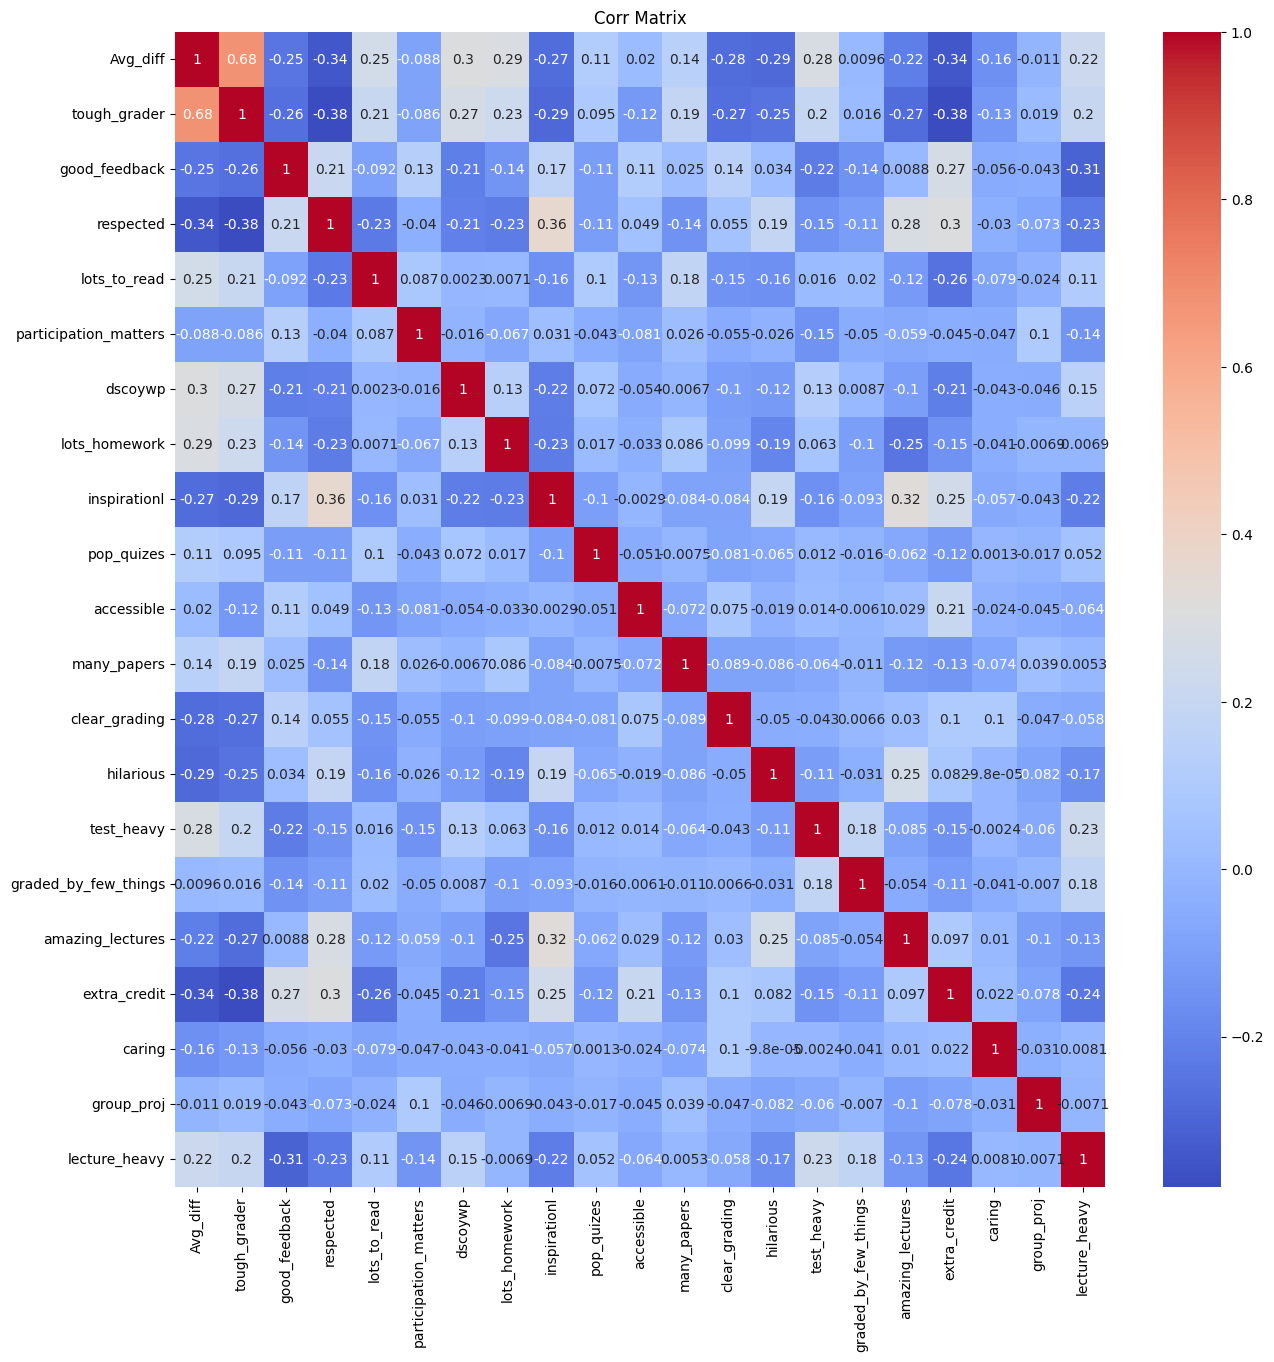

In [136]:
# Addressing multicolinearity concerns
plt.figure(figsize=(15,15))
corr_matrix = avg_diff_tags_df.corr()
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')
plt.title('Corr Matrix')
plt.show()

In [137]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [138]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [139]:
r2 = r2_score(y_test,y_pred)
print(f"R^2: {r2}")

R^2: 0.5763032907864334


In [140]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 0.5165477269132167


In [141]:
lasso = LassoCV()
lasso.fit(X_train,y_train)


y_pred_l = lasso.predict(X_test)

In [142]:
r2 = r2_score(y_test,y_pred_l)
print(f"R^2: {r2}")

R^2: 0.5758856546896842


In [143]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_l))
print(rmse_lasso)

0.5168022436903787
